This notebook will show the all methods of normalization.

In [1]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.data_model.Sightline import Sightline
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = r"F:\Astronamy\desi-0.2-100\desi-0.2-100\desi-0.2-100\spectra-16\7"
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

### The methods of normalization

In [3]:
spec = DesiMock()
spec.read_fits_file(spectra,truth,zbest)

In [4]:
nspec = DesiMock()
nspec.read_fits_file(spectra,truth,zbest)

<IPython.core.display.Javascript object>


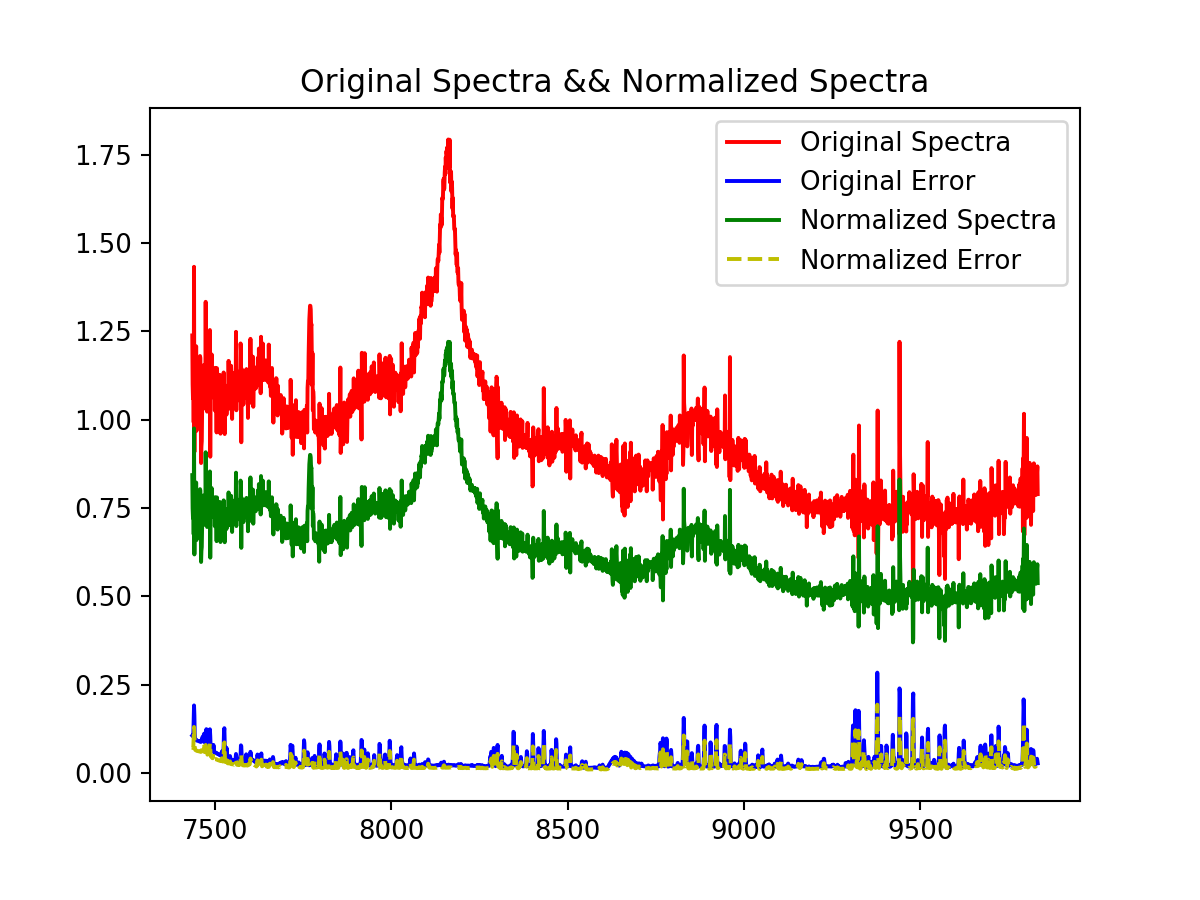

In [5]:
spec_id = list(spec.data.keys())
nspec_id = list(spec.data.keys())
sightline = spec.get_sightline(spec_id[0],camera='z')
new_sightline = nspec.get_sightline(spec_id[0],camera='z',normalize=True)
fig,axes = plt.subplots(1,1,sharex=True, sharey= True)
axes.plot(10**sightline.loglam,sightline.flux,'r',label = 'Original Spectra')
axes.plot(10**sightline.loglam,sightline.error,'b',label = 'Original Error')
axes.set(**{'title':'Original Spectra && Normalized Spectra'})
axes.plot(10**new_sightline.loglam,new_sightline.flux,'g', label = 'Normalized Spectra')
axes.plot(10**new_sightline.loglam,new_sightline.error,'y--',label = 'Normalized Error')
axes.legend(loc = 'best')

In [8]:
selected_spectrum = {}
for key,value in spec.data.items():
    z_qso = float("%.1f"%value['z_qso'])
    if z_qso<=4 and z_qso>=2.33 and z_qso not in selected_spectrum:
        selected_spectrum[z_qso] = key
    if len(selected_spectrum)==21:
        break

<IPython.core.display.Javascript object>


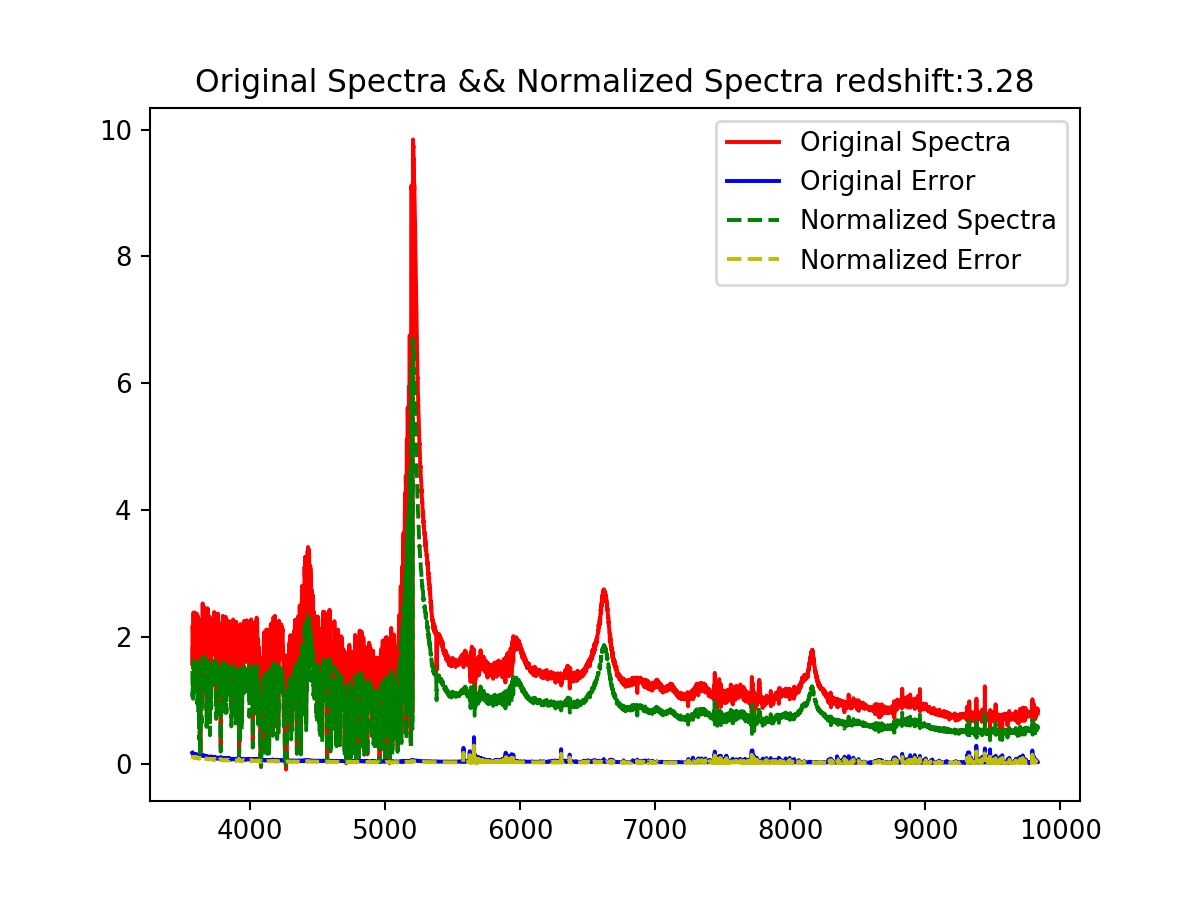

<IPython.core.display.Javascript object>


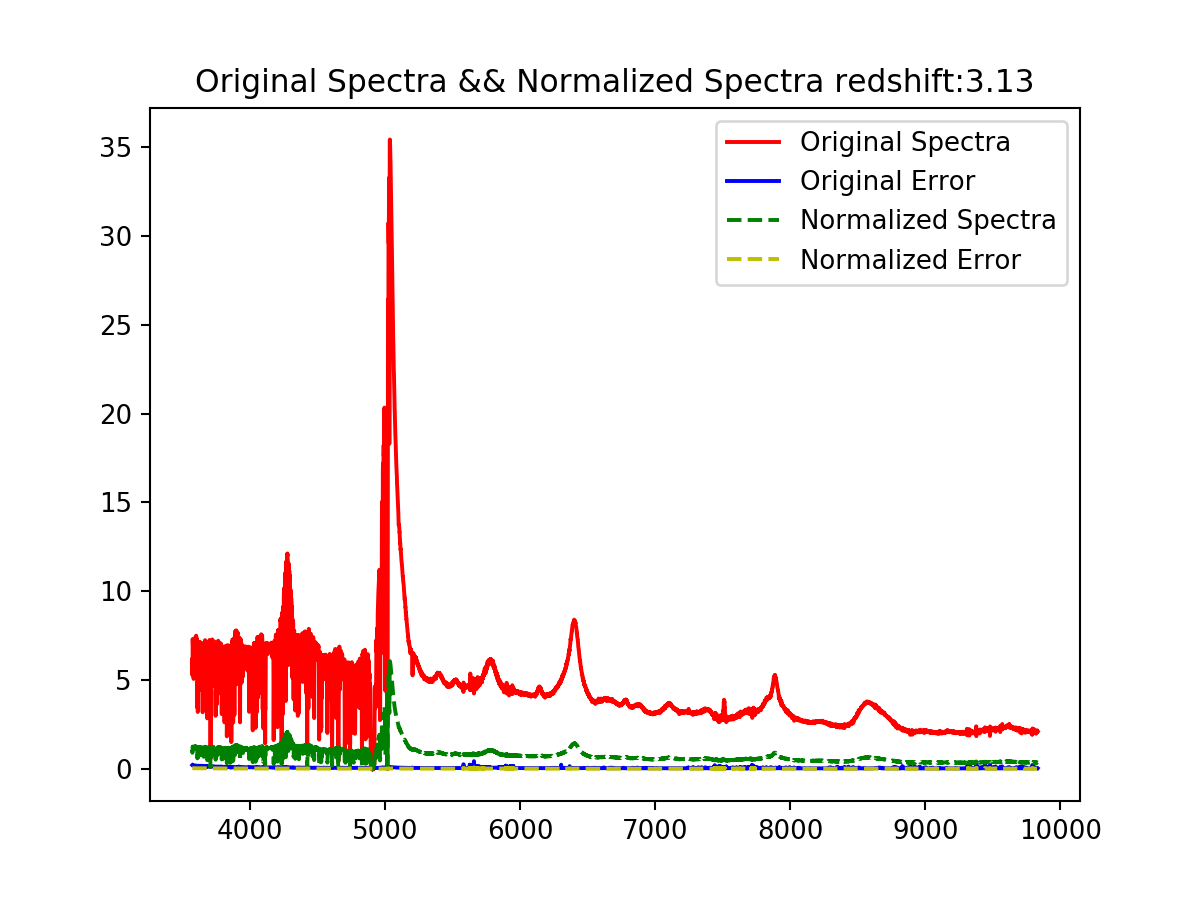

<IPython.core.display.Javascript object>


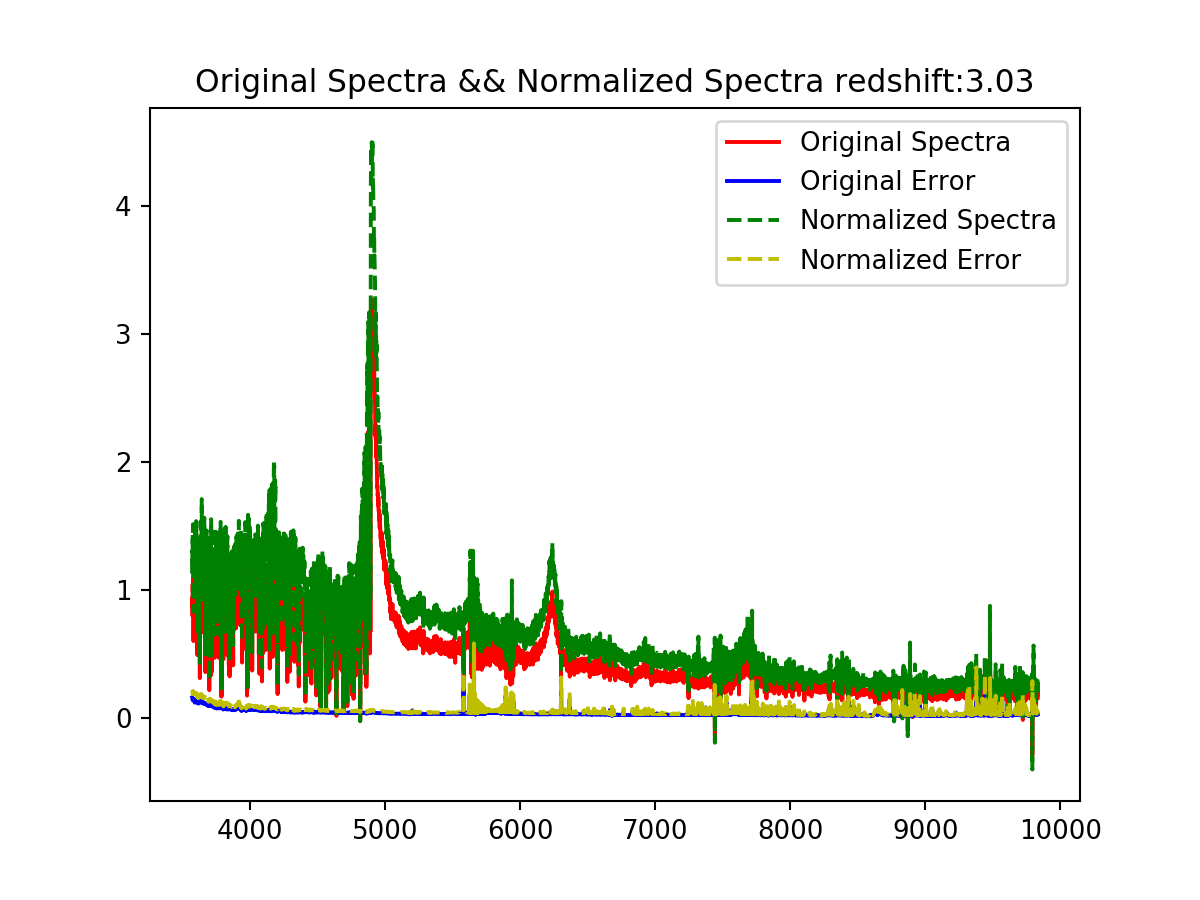

<IPython.core.display.Javascript object>


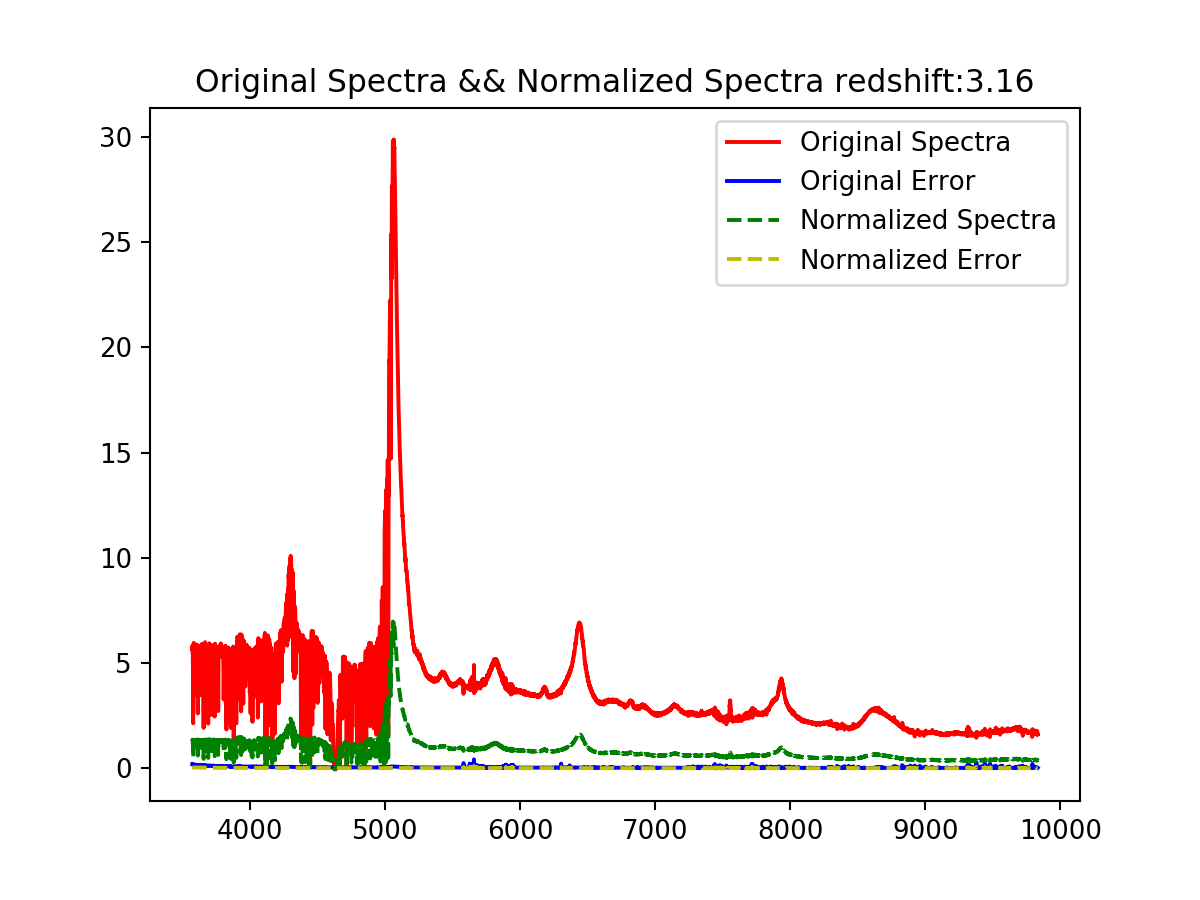

<IPython.core.display.Javascript object>


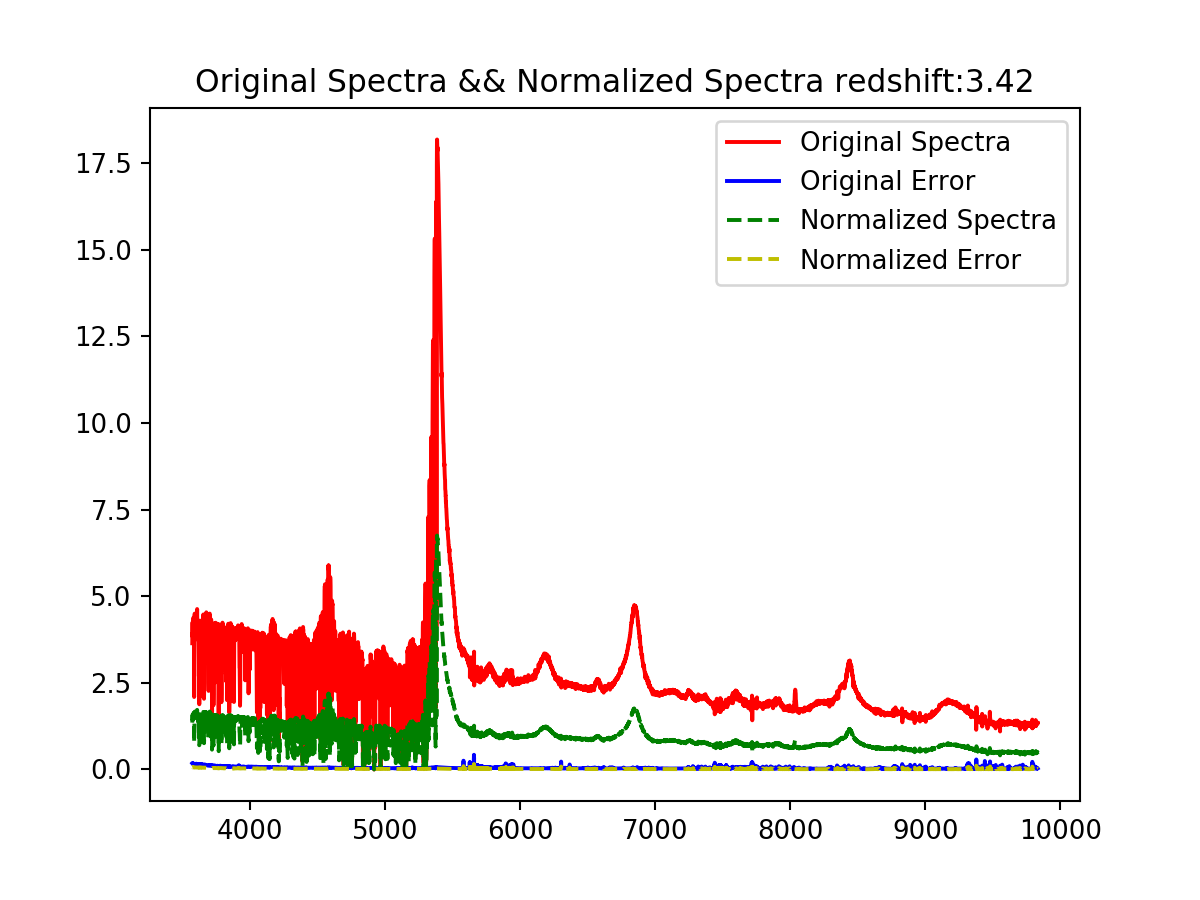

<IPython.core.display.Javascript object>


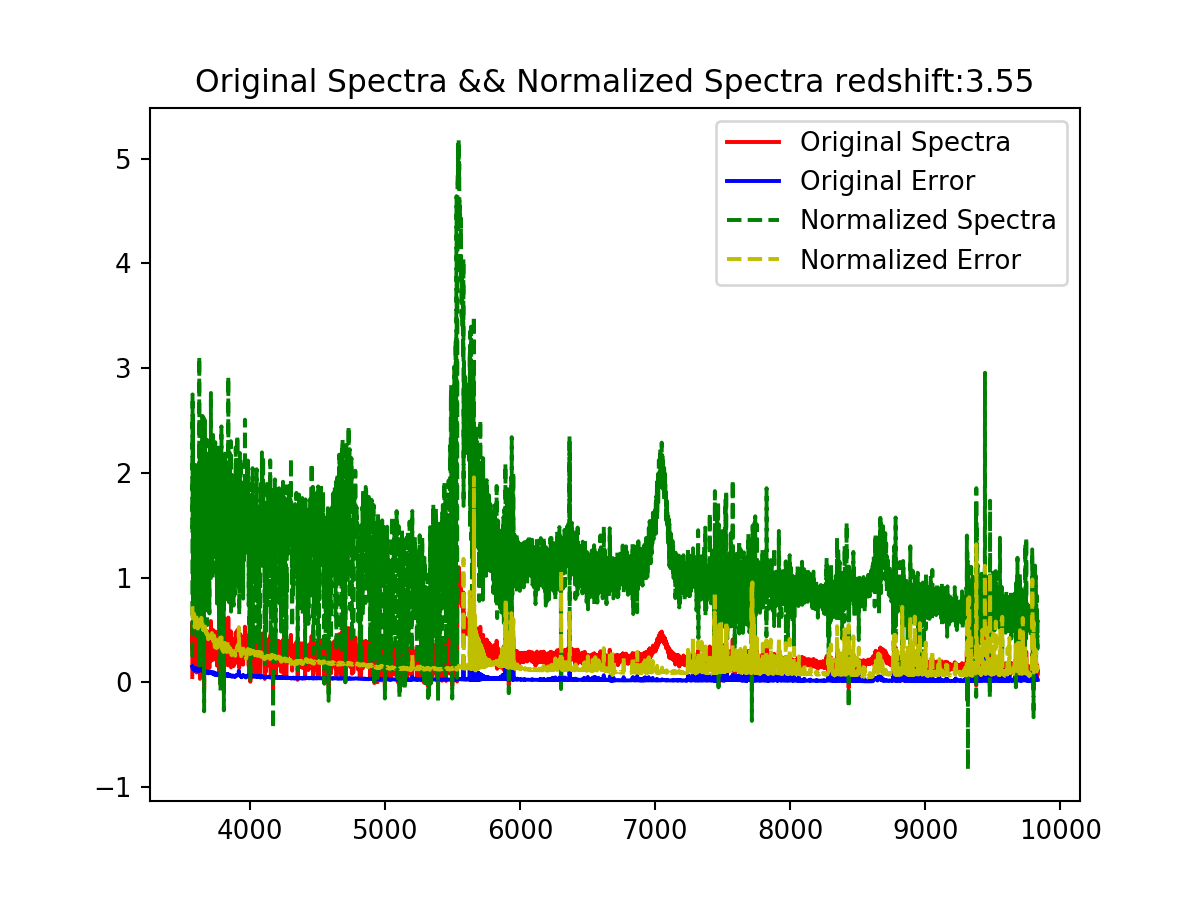

<IPython.core.display.Javascript object>


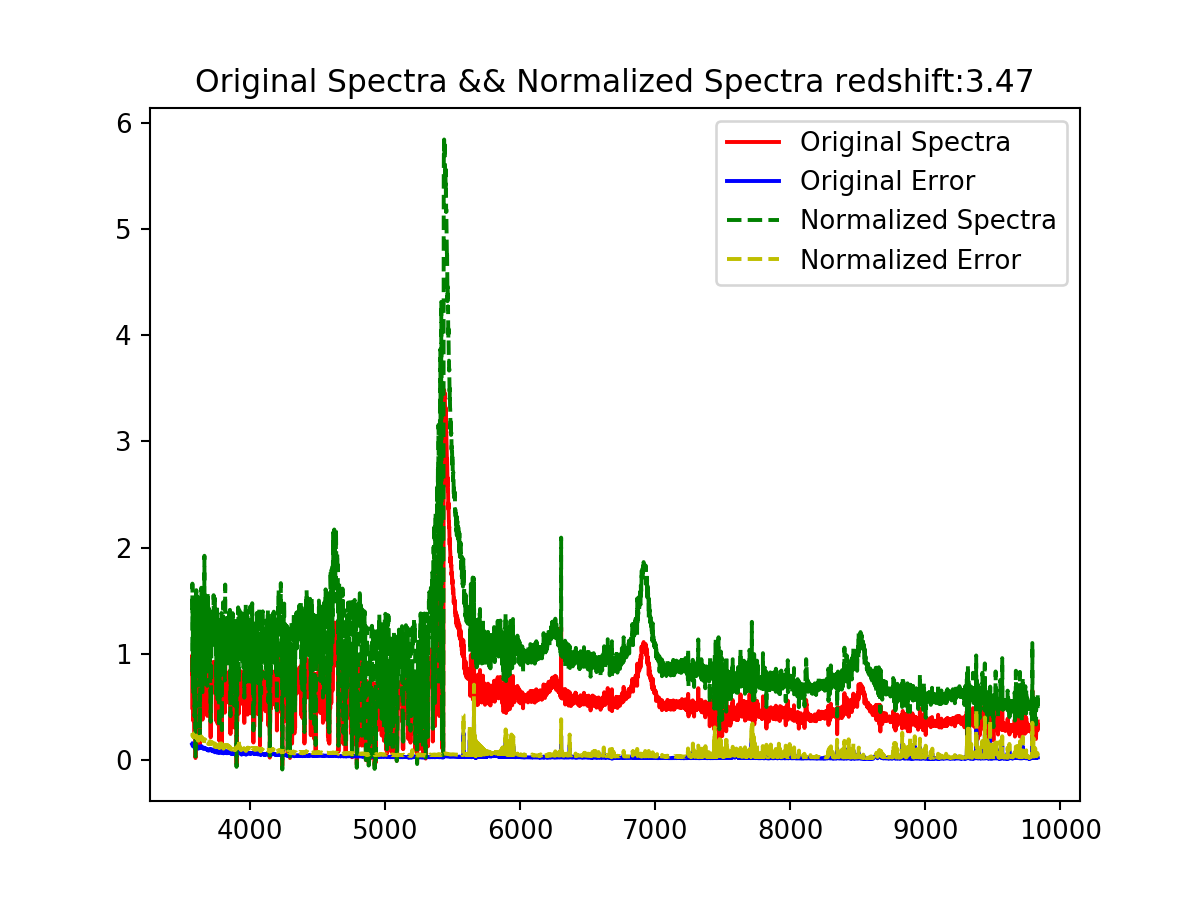

<IPython.core.display.Javascript object>


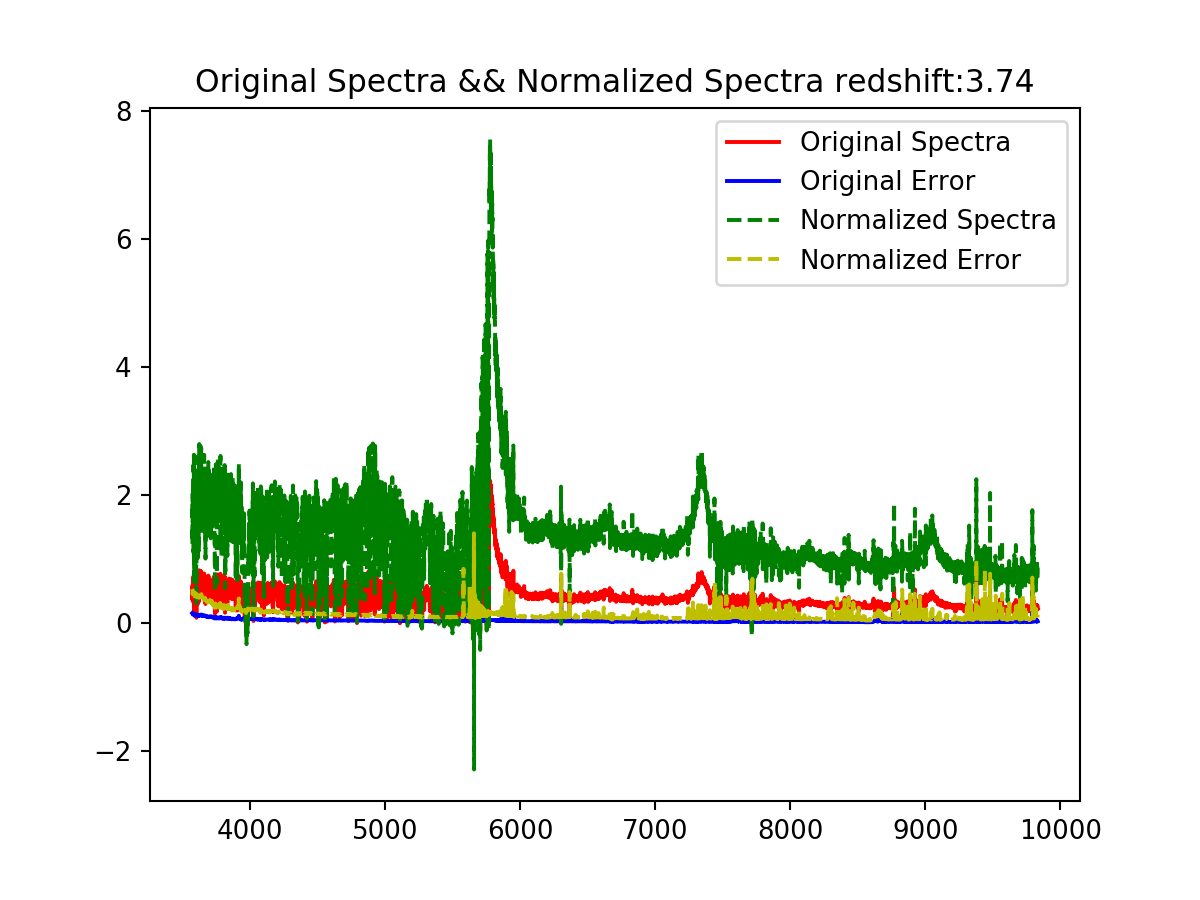

<IPython.core.display.Javascript object>


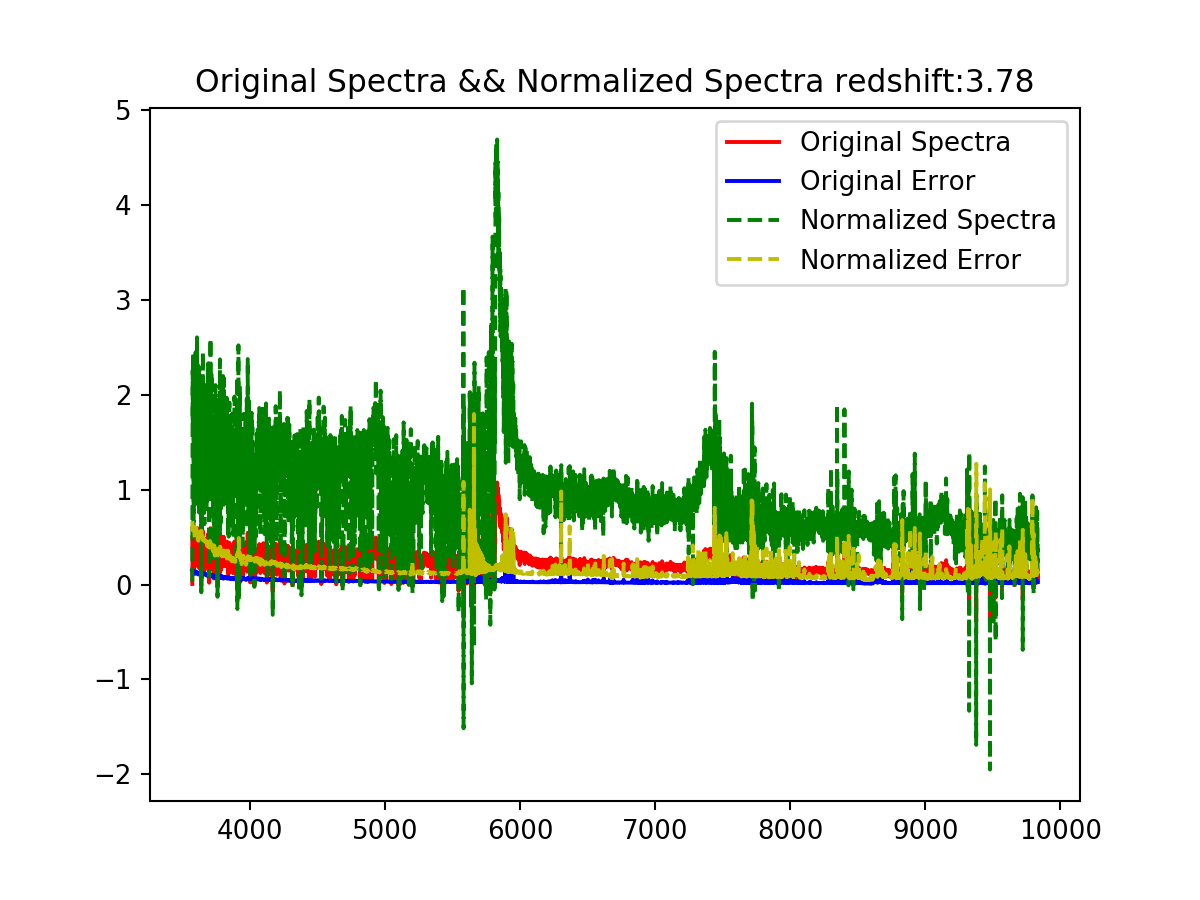

<IPython.core.display.Javascript object>


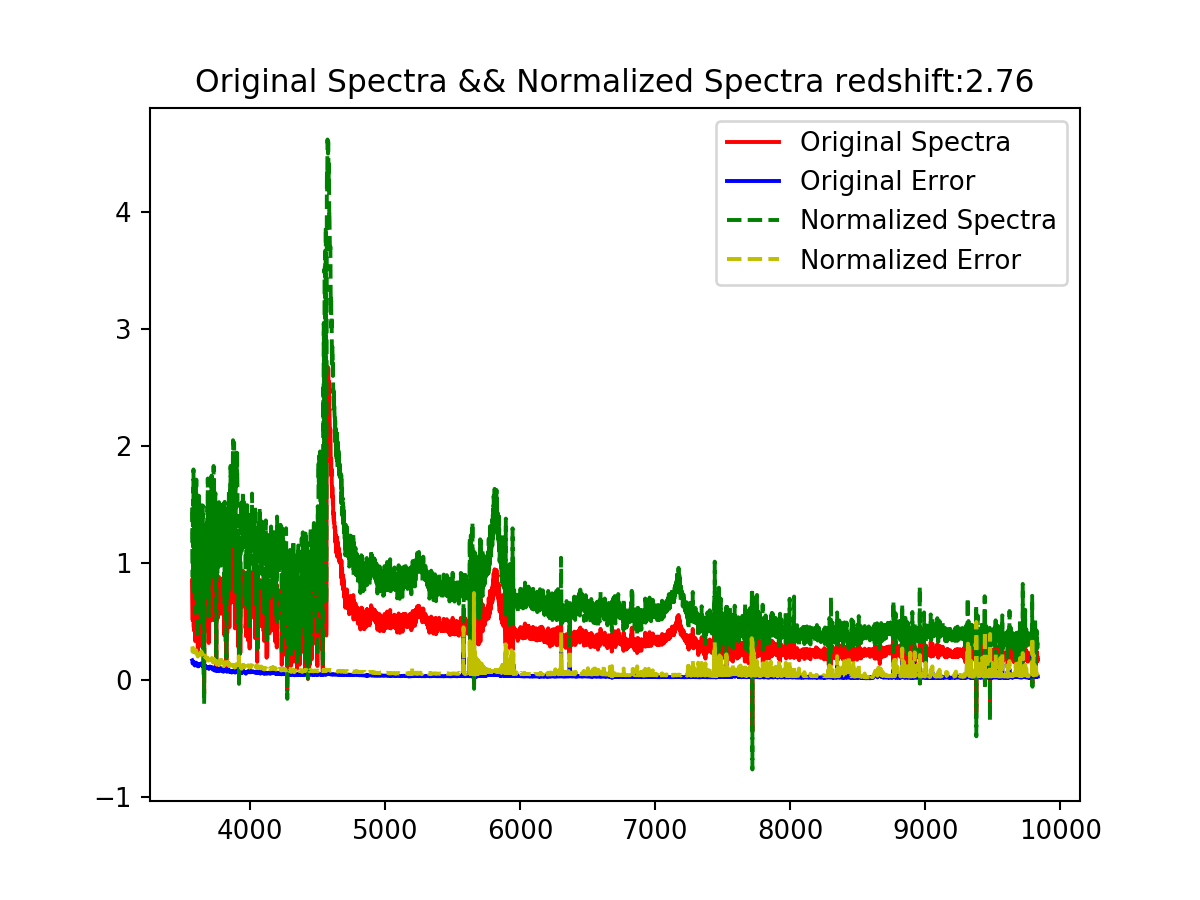

<IPython.core.display.Javascript object>


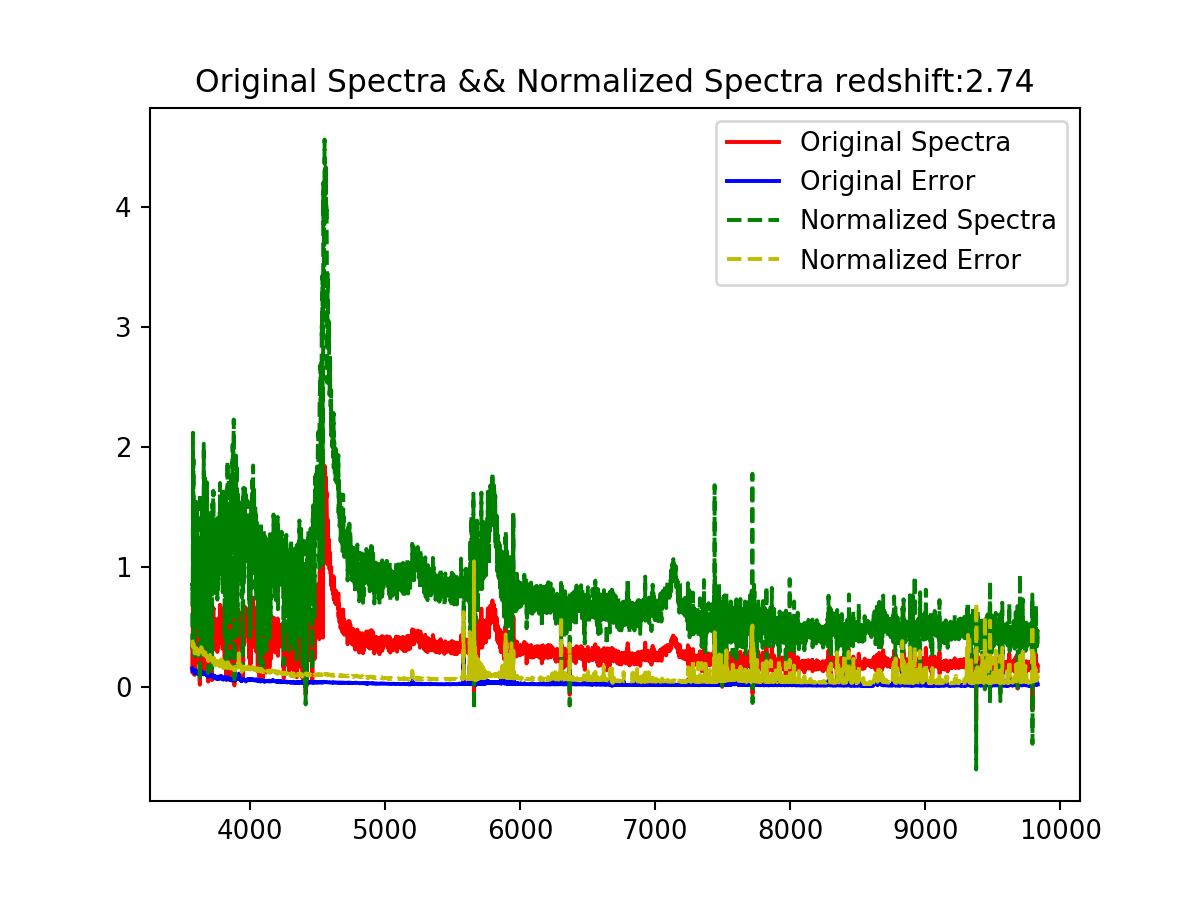

<IPython.core.display.Javascript object>


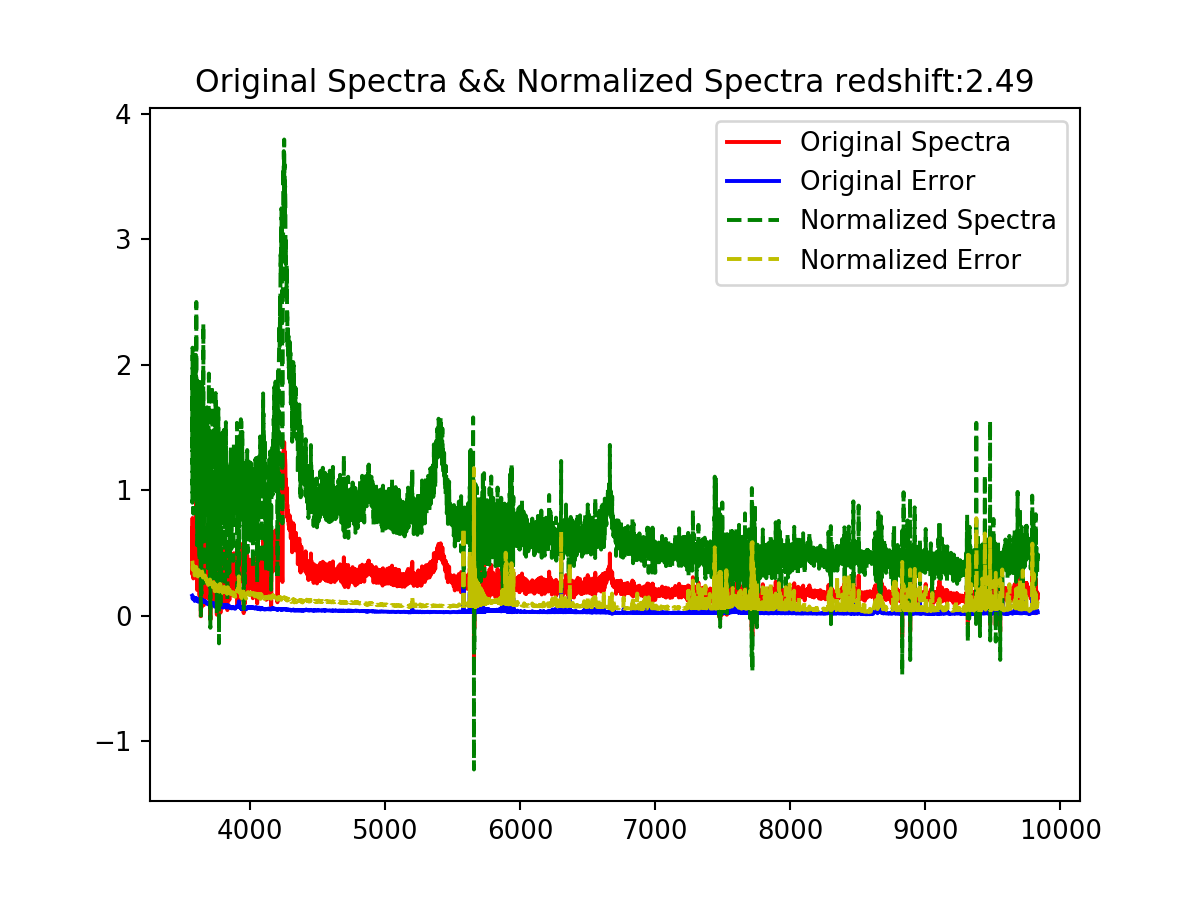

<IPython.core.display.Javascript object>


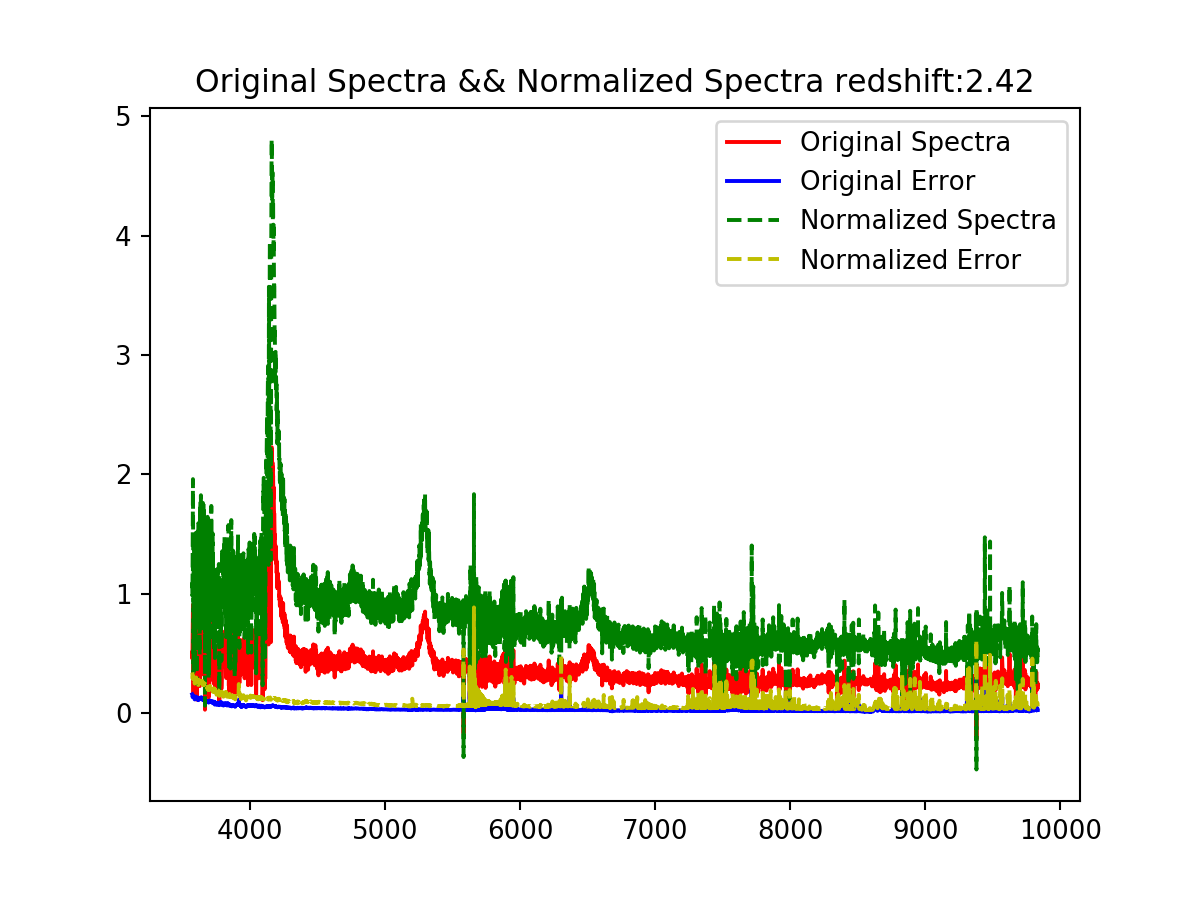

<IPython.core.display.Javascript object>


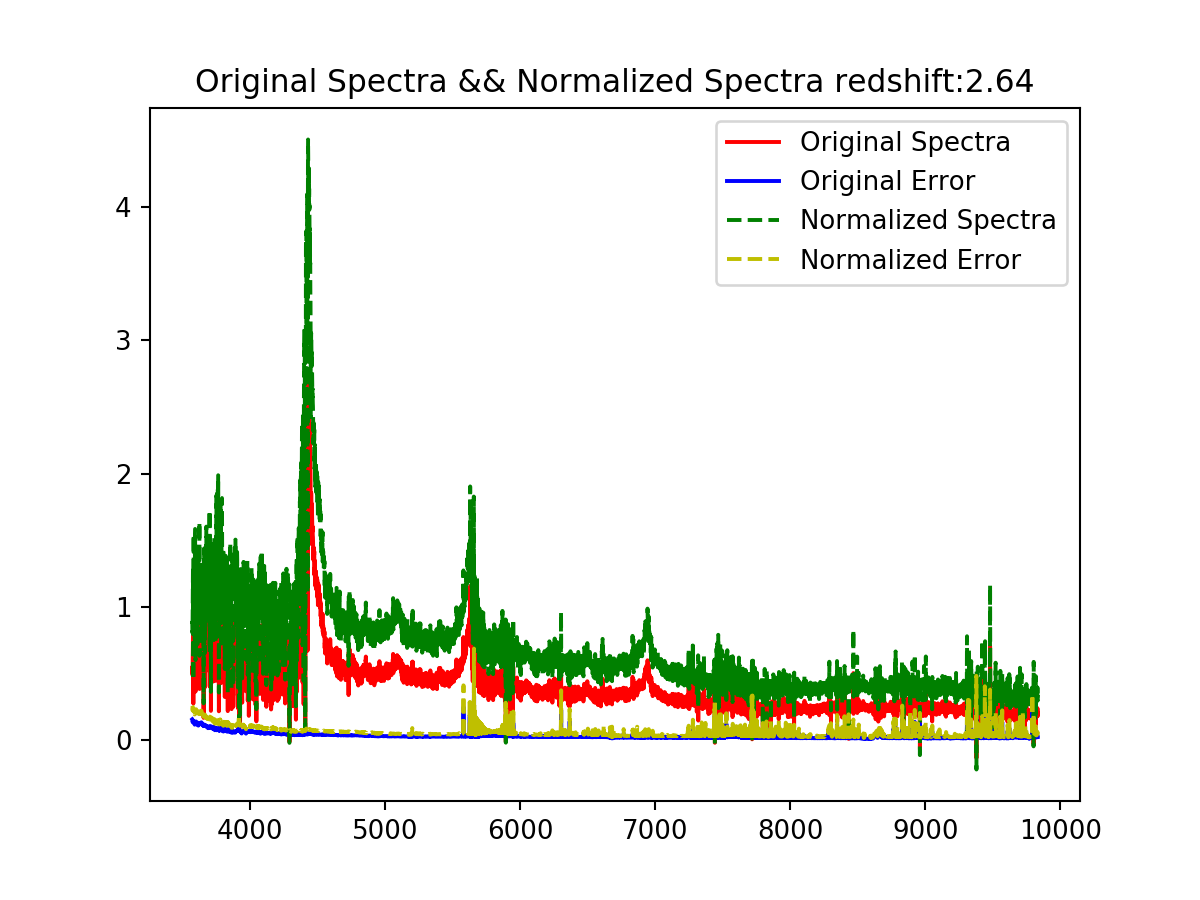

<IPython.core.display.Javascript object>


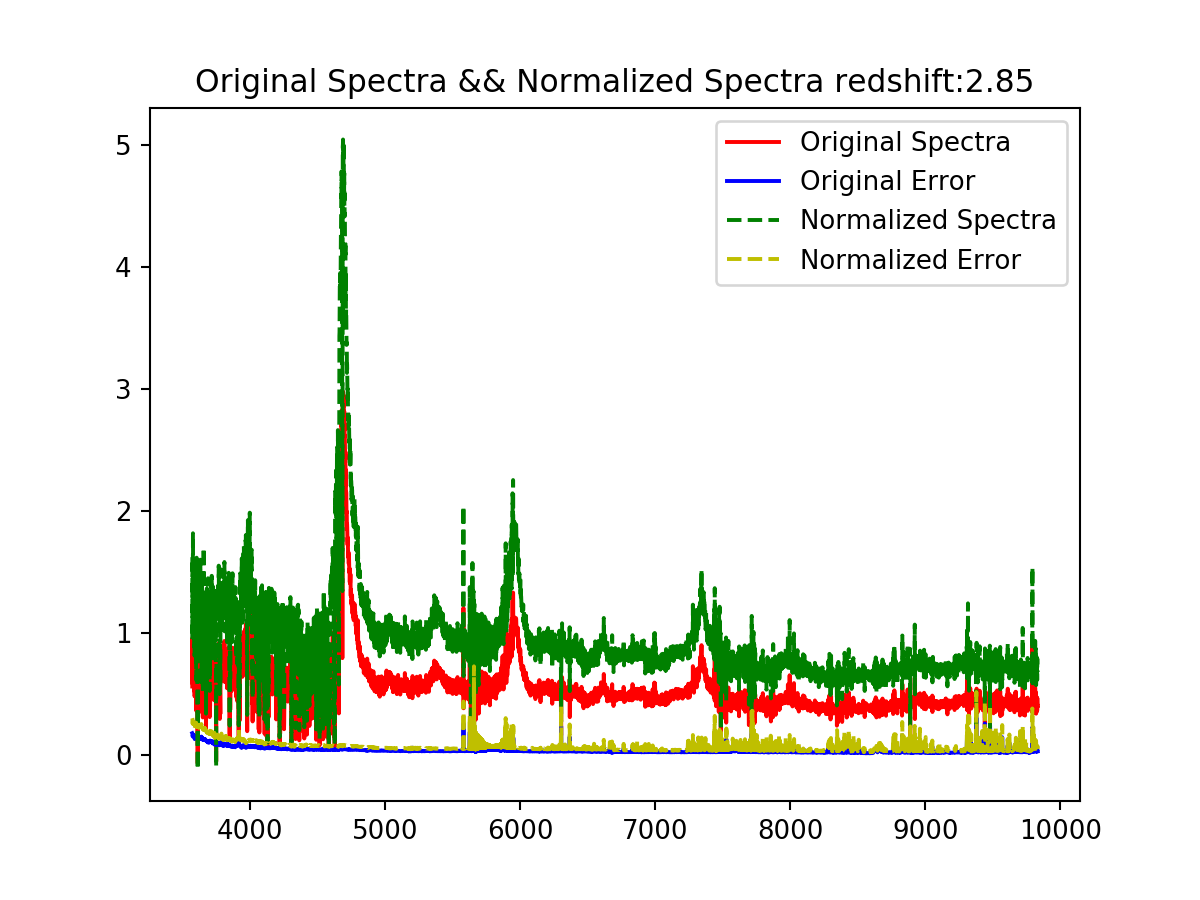

In [9]:
for key,value in selected_spectrum.items():
    sightline = spec.get_sightline(value,camera='all')
    new_sightline = nspec.get_sightline(value,camera='all',normalize=True)
    fig,axes = plt.subplots(1,1,sharex=True, sharey= True)
    axes.plot(10**sightline.loglam,sightline.flux,'r',label = 'Original Spectra')
    axes.plot(10**sightline.loglam,sightline.error,'b',label = 'Original Error')
    axes.set(**{'title':'Original Spectra && Normalized Spectra redshift:%.2f'%sightline.z_qso})
    axes.plot(10**new_sightline.loglam,new_sightline.flux,'g--', label = 'Normalized Spectra')
    axes.plot(10**new_sightline.loglam,new_sightline.error,'y--',label = 'Normalized Error')
    axes.legend(loc = 'best')
    plt.savefig("F:\\Astronamy\\normalized figure\\id-%i-z_qso-%.2f.png"%(value,sightline.z_qso))